# Assignment 2: Clustering HW

Eric VanMeerhaeghe





MKTG 880






2/23/2019


## Section 1: Data Acquisition and Preprocessing

### Section 1.1: Importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward, complete

from sklearn.metrics import pairwise_distances

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_csv('pda2001_original.csv')
df.head()

,id,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price,age,education,income,construction,emergency,sales,service,professional,computers,pda,cell,pc,away,businessweek,pcmagazine,fieldstream,mgourmet
0,1,4,1,5,7,4,6,3,1,4,5,5,6,4,15,280,48,3,47,0,0,0,0,0,0,1,1,1,3,0,0,0,0
1,2,5,4,7,5,6,5,6,5,4,7,3,6,1,15,310,43,3,89,0,0,0,1,0,0,0,1,1,3,1,0,0,0
2,3,3,5,5,6,3,4,7,6,4,4,4,6,3,35,370,48,2,24,0,0,0,0,0,1,1,1,1,6,0,0,0,0
3,4,3,1,6,7,5,7,3,4,4,4,7,5,5,15,390,28,3,52,0,0,1,0,0,0,1,1,1,7,0,0,0,0
4,5,4,1,6,7,7,5,5,5,2,7,5,5,4,25,410,54,3,84,0,0,0,0,0,1,1,1,1,2,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 33 columns):
id              160 non-null int64
innovator       160 non-null int64
usemessage      160 non-null int64
usecell         160 non-null int64
usepim          160 non-null int64
infpassive      160 non-null int64
infactive       160 non-null int64
remoteaccess    160 non-null int64
shareinf        160 non-null int64
monitor         160 non-null int64
email           160 non-null int64
web             160 non-null int64
mmedia          160 non-null int64
ergonomic       160 non-null int64
monthly         160 non-null int64
price           160 non-null int64
age             160 non-null int64
education       160 non-null int64
income          160 non-null int64
construction    160 non-null int64
emergency       160 non-null int64
sales           160 non-null int64
service         160 non-null int64
professional    160 non-null int64
computers       160 non-null int64
pda             160 

### Section 1.2: Splitting data into segementation data 

In [4]:
segdata = df.loc[:, "innovator":"price"]

### Section 1.3: Standardizing the data

In [7]:
segdata = ((segdata - segdata.mean())/(segdata.std()))
segdata.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648


## Section 2: Hierarchical Clustering

### Section 2.1: Hierarchical Clustering with Complete Linkage

In [8]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='complete').fit(segdata.values)
agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [10]:
df2 = segdata.join(df1)
df2.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price,cluster
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445,0
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500,0
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388,0
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018,0
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648,0


### Section 2.2: Getting cluster means for each variable

In [11]:
df2.groupby('cluster').mean()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
cluster,,,,,,,,,,,,,,,
0,0.221714,-0.305365,0.113441,0.730270,0.199845,0.332169,-0.258334,-0.160170,-0.172735,0.584897,0.537190,0.535754,-0.219501,-0.256005,-0.261182
1,-0.702022,0.804057,-0.102915,-0.942756,-0.437593,-0.478515,0.719737,-0.023608,0.559007,-0.864824,-0.704947,-0.876053,-0.410035,-0.409150,-0.538240
2,-0.801875,-0.602762,-1.053782,-0.463570,1.031088,1.100585,0.712431,1.476000,0.137800,-1.017229,-1.518869,-1.050823,0.545519,1.708063,1.376607
3,1.088198,-0.209686,0.501493,-0.039455,-0.391004,-0.710431,-0.969076,-0.413257,-0.579812,0.538144,0.688480,0.706410,0.952514,0.358084,0.788046


### Section 2.3: Plotting a Dendrogram of our Clusters

In [12]:
X = df2.drop('cluster', axis=1)
X.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648


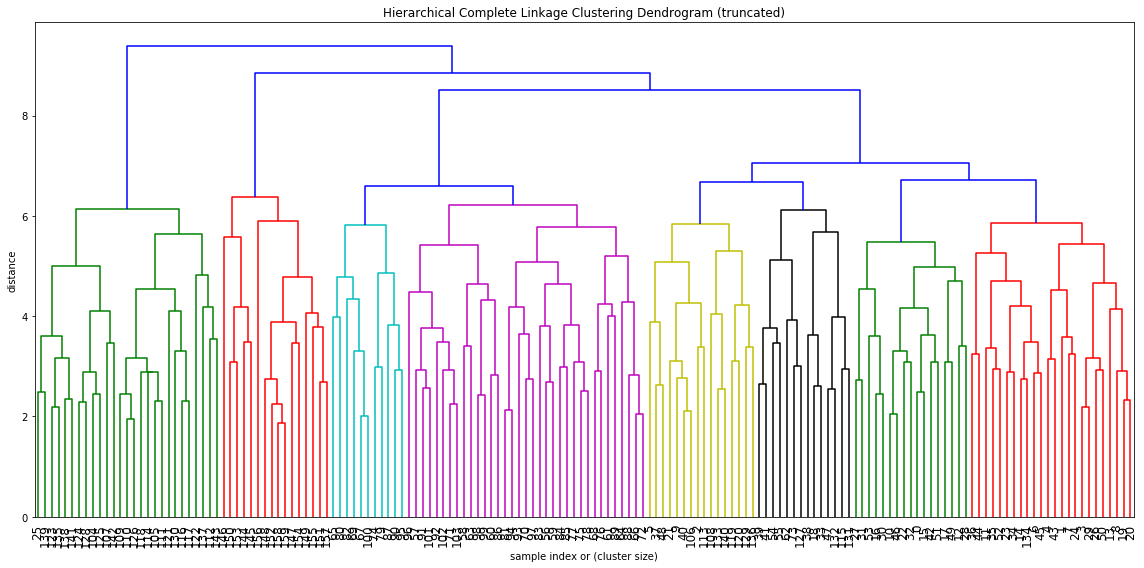

In [15]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Complete Linkage Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = complete(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

## Section 3: Hierarchical Clustering with Ward Linkage

### Section 3.1: Building our Clustering algorithm with the Ward Linkage function.

In [16]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(segdata.values)
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [18]:
df2 = segdata.join(df1)
df2.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price,cluster
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445,1
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500,1
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388,1
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018,1
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648,1


### Section 3.2: Getting cluster averages for each variable

In [19]:
df2.groupby('cluster').mean()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
cluster,,,,,,,,,,,,,,,
0,-0.649988,0.840879,-0.105804,-0.821736,-0.349429,-0.376110,0.565491,0.007948,0.504612,-0.775994,-0.717949,-0.790786,-0.297884,-0.356399,-0.523785
1,0.149031,-0.312210,0.239805,0.926700,0.349559,0.437988,-0.070091,-0.195562,-0.339430,0.681426,0.592904,0.599566,-0.430023,-0.423563,-0.373130
2,-0.801875,-0.602762,-1.053782,-0.463570,1.031088,1.100585,0.712431,1.476000,0.137800,-1.017229,-1.518869,-1.050823,0.545519,1.708063,1.376607
3,1.017125,-0.425861,0.238579,-0.069448,-0.493292,-0.620407,-0.981455,-0.353240,-0.241404,0.478150,0.749045,0.636961,0.825544,0.393699,0.691422


### Section 3.3: Plotting a Dendrogram of our Ward Linkage Clustering Algorithm

In [20]:
X = df2.drop('cluster', axis=1)
X.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648


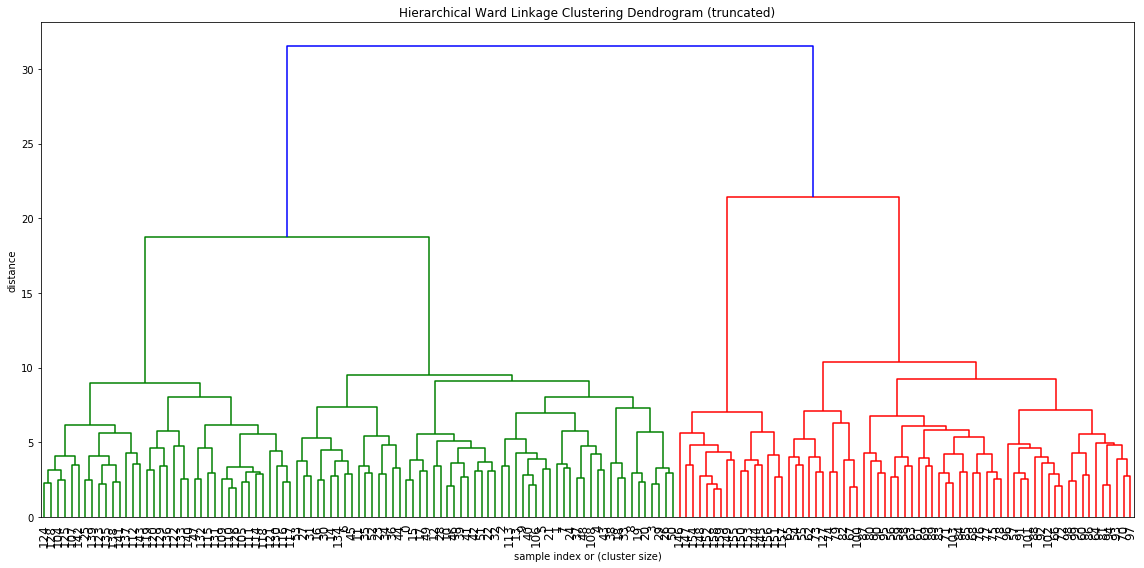

In [21]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Ward Linkage Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

### Some notes about our clustering analysis so far:

- I used both the complete linkage and the ward linkage for two main reasons:
                        
                        
 1. You used the complete linkage clustering algorithm in class
 
 
 
 2. I used ward because it minimizes the total within-cluster variance, and minimizes the euclidian distance between clusters,     which I believe leads to more accurate clusters
 
 
 
 
 
 3. I am not sure that 4 Clusters is the optimal number of clusters, so I am going to do K-Means clustering and try a bunch of     different values of k to find the optimal number of clusters, and I will determine the optimal number of clusters by using     the "elbow method" and silhouette scores. I'll try 4 first and assume that 4 is the optimal number, and then if I find         another value of k that indicates that value of k is the optimal number of clusters, I'll re-run both the complete linkage     and ward linkage clustering we did above with the new optimal number of k clusters.

## Section 4: K-Means Clustering and Determining the optimal number of Clusters

### Section 4.1: K-Means Clustering with 4 Clusters

In [23]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=1)
k_means.fit(segdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [24]:
#Making a dataframe out of the clusters
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [25]:
#Adding the cluster column onto our original data
df2 = segdata.join(df1)
df2.head()

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price,cluster
0,0.326978,-1.897035,-0.471290,1.470528,-0.277009,0.943359,-0.530963,-1.659544,-0.530321,0.151210,0.262521,1.006511,-0.396384,-1.418014,-0.461445,0
1,0.949794,-0.122031,1.223235,0.488130,0.954141,0.314453,1.082089,0.787710,-0.530321,1.250917,-0.737558,1.006511,-2.280189,-1.418014,-0.196500,0
2,-0.295837,0.469636,-0.471290,0.979329,-0.892583,-0.314453,1.619773,1.399523,-0.530321,-0.398644,-0.237519,1.006511,-1.024319,0.644552,0.333388,0
3,-0.295837,-1.897035,0.375973,1.470528,0.338566,1.572264,-0.530963,0.175896,-0.530321,-0.398644,1.262599,0.500090,0.231551,-1.418014,0.510018,0
4,0.326978,-1.897035,0.375973,1.470528,1.569716,0.314453,0.544405,0.787710,-1.866564,1.250917,0.262521,0.500090,-0.396384,-0.386731,0.686648,0


### Section 4.2: Getting Cluster Means

In [26]:
df2.groupby(['cluster']).mean() 

,innovator,usemessage,usecell,usepim,infpassive,infactive,remoteaccess,shareinf,monitor,email,web,mmedia,ergonomic,monthly,price
cluster,,,,,,,,,,,,,,,
0,0.101476,-0.254647,0.215285,0.894639,0.349179,0.455414,-0.132335,-0.193301,-0.334493,0.691583,0.512540,0.596136,-0.374731,-0.422293,-0.373130
1,-0.662200,-0.504875,-1.069357,-0.494269,0.954141,1.054342,0.702547,1.471502,0.137800,-1.013186,-1.531738,-1.048961,0.453175,1.645503,1.336021
2,-0.719882,0.809531,-0.092726,-0.880958,-0.368690,-0.448263,0.658806,-0.032381,0.564261,-0.854905,-0.695001,-0.857548,-0.342943,-0.397702,-0.581703
3,1.031743,-0.386725,0.264491,-0.054775,-0.503799,-0.612356,-0.927151,-0.323215,-0.249007,0.455076,0.762560,0.620032,0.793388,0.400301,0.691296


### Section 4.3: Finding the optimal number of Clusters k

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

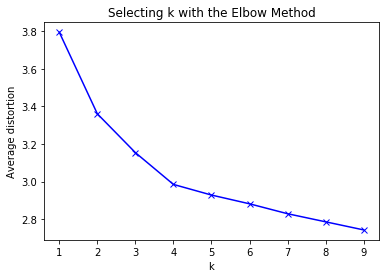

In [27]:
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(segdata) 
    meandistortions.append(sum(np.min(cdist(segdata, kmeans.cluster_centers_, 'euclidean'), axis=1)) / segdata.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

#### Looks like optimal number of clusters could be 3 or 4, lets double check with shilouette scores to be sure.

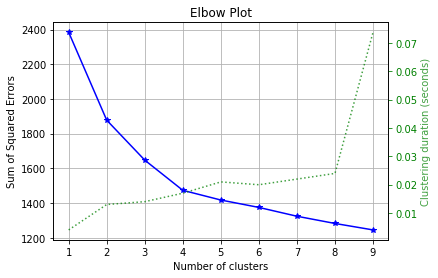

In [28]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, segdata, cluster_ranges=range(1, 10))

In [30]:
#Using silhouette score to determine optimal number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

tests = [2, 3, 4, 5, 6]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(segdata)
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(segdata, labels, metric='euclidean'))

0.2038034381293901
0.21160633282349456
0.17693391875586434
0.15057142656141204
0.13370305001750757


#### 4 Clusters does indeed appear to be the most optimal number of clusters.

## Section 5: Analysis of Demographic Data as it relates to Cluster

- I am going to use the clusters given by the ward linkage clustering algorithm to analyze the characteristics of each cluster

### Section 5.1: Demographic Data

In [31]:
demdata = df.loc[:, "age":"mgourmet"]
demdata.head()

,age,education,income,construction,emergency,sales,service,professional,computers,pda,cell,pc,away,businessweek,pcmagazine,fieldstream,mgourmet
0,48,3,47,0,0,0,0,0,0,1,1,1,3,0,0,0,0
1,43,3,89,0,0,0,1,0,0,0,1,1,3,1,0,0,0
2,48,2,24,0,0,0,0,0,1,1,1,1,6,0,0,0,0
3,28,3,52,0,0,1,0,0,0,1,1,1,7,0,0,0,0
4,54,3,84,0,0,0,0,0,1,1,1,1,2,1,0,0,0


In [36]:
demdata['cluster'] = agg.labels_
demdata.head()

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,education,income,construction,emergency,sales,service,professional,computers,pda,cell,pc,away,businessweek,pcmagazine,fieldstream,mgourmet,cluster
0,48,3,47,0,0,0,0,0,0,1,1,1,3,0,0,0,0,1
1,43,3,89,0,0,0,1,0,0,0,1,1,3,1,0,0,0,1
2,48,2,24,0,0,0,0,0,1,1,1,1,6,0,0,0,0,1
3,28,3,52,0,0,1,0,0,0,1,1,1,7,0,0,0,0,1
4,54,3,84,0,0,0,0,0,1,1,1,1,2,1,0,0,0,1


### Section 5.2: Getting cluster means for Demographic Data

In [37]:
demdata.groupby('cluster').mean()

,age,education,income,construction,emergency,sales,service,professional,computers,pda,cell,pc,away,businessweek,pcmagazine,fieldstream,mgourmet
cluster,,,,,,,,,,,,,,,,,
0,36.764706,2.196078,60.529412,0.058824,0.019608,0.235294,0.392157,0.156863,0.137255,0.176471,0.901961,1.0000,4.843137,0.176471,0.294118,0.235294,0.000000
1,43.071429,2.482143,62.589286,0.053571,0.017857,0.535714,0.107143,0.089286,0.178571,0.446429,0.910714,1.0000,4.357143,0.303571,0.142857,0.035714,0.000000
2,42.187500,1.937500,52.437500,0.312500,0.187500,0.062500,0.125000,0.000000,0.312500,0.187500,0.625000,0.8125,5.375000,0.000000,0.250000,0.312500,0.000000
3,38.891892,3.216216,88.432432,0.054054,0.027027,0.135135,0.027027,0.351351,0.405405,0.891892,0.891892,1.0000,2.594595,0.486486,0.324324,0.027027,0.081081


### Section 5.3: Visualizing our Data

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


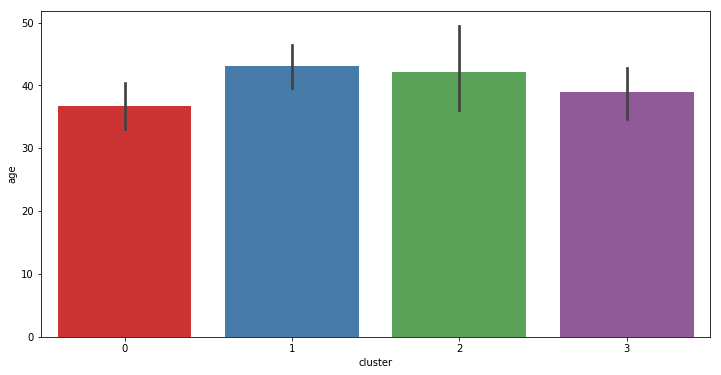

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x='cluster', y='age', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


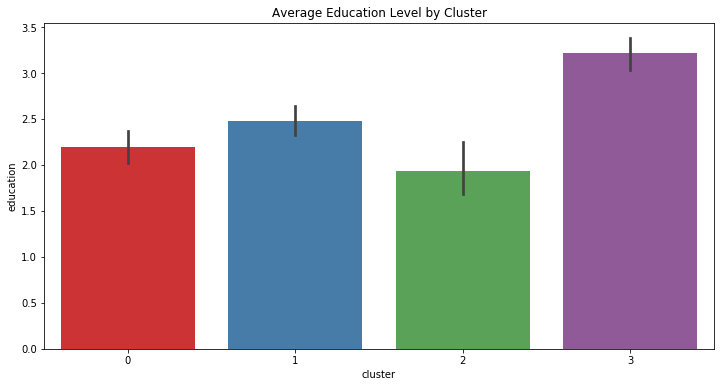

In [88]:
plt.figure(figsize=(12,6))
plt.title('Average Education Level by Cluster')
sns.barplot(x='cluster', y='education', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


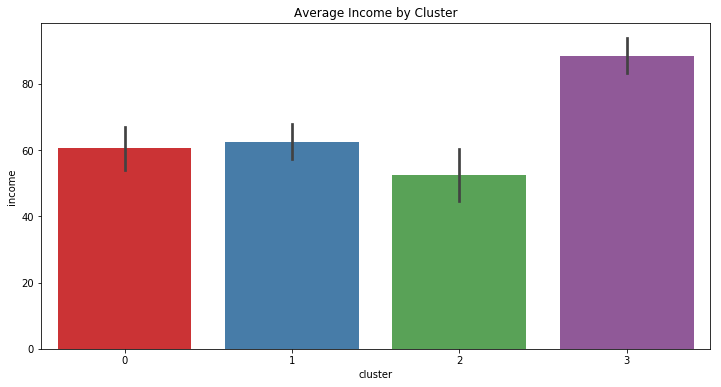

In [89]:
plt.figure(figsize=(12,6))
plt.title('Average Income by Cluster')
sns.barplot(x='cluster', y='income', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


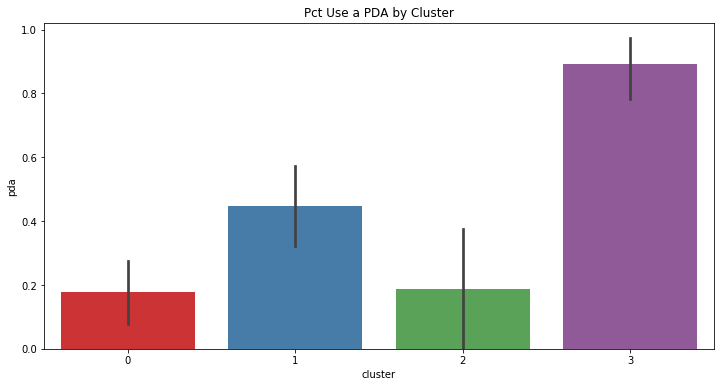

In [90]:
plt.figure(figsize=(12,6))
plt.title('Pct Use a PDA by Cluster')
sns.barplot(x='cluster', y='pda', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


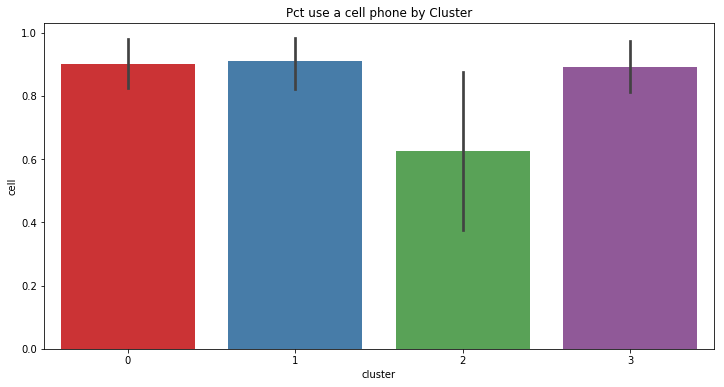

In [91]:
plt.figure(figsize=(12,6))
plt.title('Pct use a cell phone by Cluster')
sns.barplot(x='cluster', y='cell', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


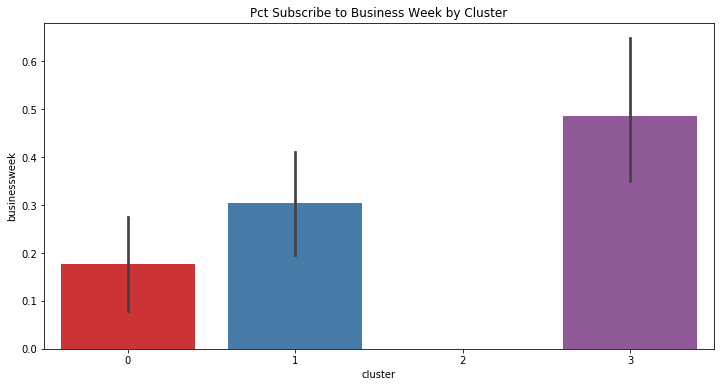

In [92]:
plt.figure(figsize=(12,6))
plt.title('Pct Subscribe to Business Week by Cluster')
sns.barplot(x='cluster', y='businessweek', data=demdata, palette='Set1')

C:\Users\Eric\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


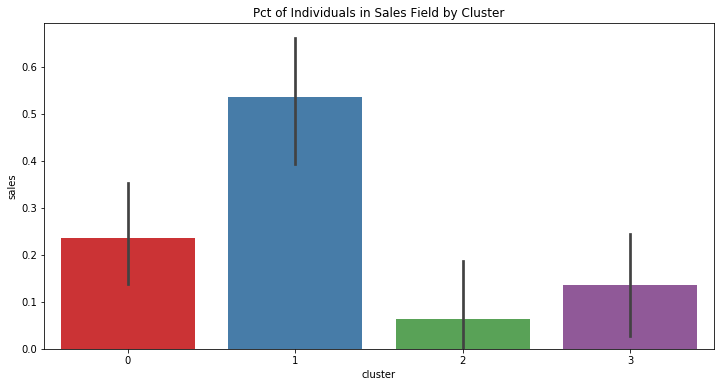

In [93]:
plt.figure(figsize=(12,6))
plt.title('Pct of Individuals in Sales Field by Cluster')
sns.barplot(x='cluster', y='sales', data=demdata, palette='Set1')

## Section 6: Summary of Analysis

- Each subsection in this section will correspond to one of the questions we are supposed to answer for Assignment 2.

### Section 6.1: Run cluster Analysis (in Stata or R) for Segmentation

- See Above for Analysis

### Section 6.2: Identify and profile (name) the clusters that you select. Given the attributes of ConneCtor, which clusters would you target for your marketing campaign?

- Cluster 0 Name: Service Professionals
- Cluster 1 Name: Sales Professionals
- Cluster 2 Name: Blue Collar Workers
- Cluster 3 Name: Business Professionals



#### Based on our analysis of the demographic data of each cluster, I would say that the main cluster that should be targeted in the marketing campaing should be the Business Professionals. They tended to be the most education, have the highest income, some of the most likely to use a PDA and a Cell Phone and a Computer, meaning that they are Tech Savy, and they were the 2nd youngest cluster. This group of people would make excellent potential customers for Conglomorate Inc's new PDA.





#### The second cluster that I think the marketing team should target is the sales professionals. They shared some similar characteristics with the Business Professionals, and having a handheld personal assistant would likely enhance their ability to do their sales jobs.

### Section 6.3: How has this analysis helped you to segment the market for ConneCtor?

- Our analysis has revealed Demographic information about the customers that we might want to target, and it has allowed us to see which groups share characteristics that make them most likely to purchase a PDA.

### Section 6.4: What concerns do you have with the approach (data collection, analysis, etc.) so far?

- I am concerned about the incredibly small sample size that we have to work with. It is very hard to make any meaningful statistical inferences about the actual population given this small of a sample size. 





- Another concern that I have is the clustering algorithm that we used. I think there is a legitimate debate to be had about which linkage function produces more accurate clusters and under what circumstances. I personally think that the Ward Linkage is a better method for reducing the overall variance and increasing the overall accuracy of our clustering algorithm, which is why I used it. This has consequences however, as different clustering algorithms produce different results and this can potentially change how we classify our clusters, and in turn impact which group we actually decide to market our products to.